In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


In [2]:
df = pl.read_parquet(r'C:\Users\dadoi\OneDrive\Desktop\davide\example_data_week5\output\extract\polygon_df/plot_23.parquet')

In [3]:
df = df.drop_nans().drop_nulls()
df

Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str
563612.101292,5.7130e6,0.070561,0.158527,0.065911,0.298675,0.663345,187.834198,"""plot_23""",19.744476,10.336208,-1.35459,10.424592,1.08502,27.83,1.701107,13.234668,13.234668,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.108596,5.7130e6,0.068326,0.149116,0.067453,0.27903,0.652353,187.832626,"""plot_23""",19.746048,10.328904,-1.354682,10.417361,1.085339,27.809999,1.701206,13.240388,13.240388,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.1159,5.7130e6,0.061213,0.13374,0.067502,0.26045,0.632643,187.832291,"""plot_23""",19.746384,10.3216,-1.354773,10.410131,1.085633,27.799999,1.701306,13.246115,13.246115,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.123204,5.7130e6,0.047885,0.114154,0.049312,0.22384,0.582722,187.832077,"""plot_23""",19.746597,10.314296,-1.354865,10.402901,1.085924,27.780001,1.701406,13.251851,13.251851,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.130509,5.7130e6,0.034624,0.084735,0.031657,0.179828,0.494504,187.832001,"""plot_23""",19.746674,10.306991,-1.354957,10.395671,1.086212,27.76,1.701507,13.257595,13.257595,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563612.590393,5.7130e6,0.036292,0.100575,0.041757,0.218346,0.583712,187.901535,"""plot_23""",19.656204,14.534607,-34.882643,37.789596,0.479636,62.52,2.746797,112.792725,112.792725,563627.125,5.713009e6,42.37545,44.58717,"""IMG_0084_6.tif"""
563612.597697,5.7130e6,0.039089,0.107848,0.041955,0.232209,0.593455,187.901825,"""plot_23""",19.655914,14.527303,-34.882735,37.786872,0.47966,62.52,2.746977,112.803002,112.803002,563627.125,5.713009e6,42.37545,44.58717,"""IMG_0084_6.tif"""
563612.605001,5.7130e6,0.041063,0.108749,0.041251,0.22754,0.588171,187.902069,"""plot_23""",19.65567,14.519999,-34.882826,37.784149,0.479684,62.52,2.747156,112.81328,112.81328,563627.125,5.713009e6,42.37545,44.58717,"""IMG_0084_6.tif"""


In [4]:
df = df.with_columns(
    (pl.col("delta_z")+pl.col("elev")).alias("zcam")
)
drone_positions = (
    df.select(["xcam", "ycam","zcam", ])      # keep only the two columns of interest
      .unique()                # drop duplicate rows
)
drone_positions

xcam,ycam,zcam
f32,f32,f32
563632.125,5713005.5,207.579361
563618.625,5713031.5,207.552383
563627.0625,5.713013e6,207.512085
563633.4375,5.713007e6,207.531235
563600.0,5713027.5,207.544205
…,…,…
563618.9375,5.713017e6,207.597931
563610.5625,5713016.5,207.547546
563619.375,5.713006e6,207.516693


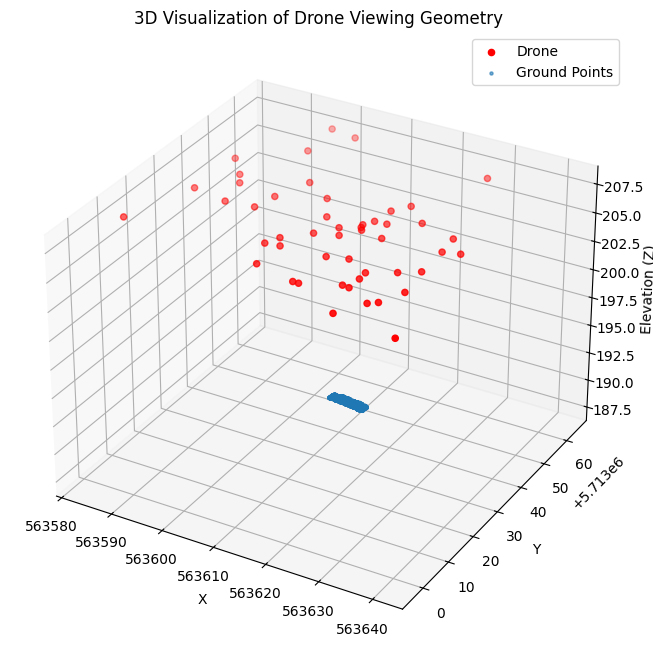

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
subsample = df.sample(10000)
# Drone position
ax.scatter(drone_positions["xcam"], drone_positions["ycam"], drone_positions["zcam"], c='red', label="Drone")
ax.scatter(subsample["Xw"], subsample["Yw"], subsample["elev"], s=5, alpha=0.6, label="Ground Points")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()


Min angle (ground-origin, cross): 158.24°
Max angle (ground-origin, cross): 44.06°


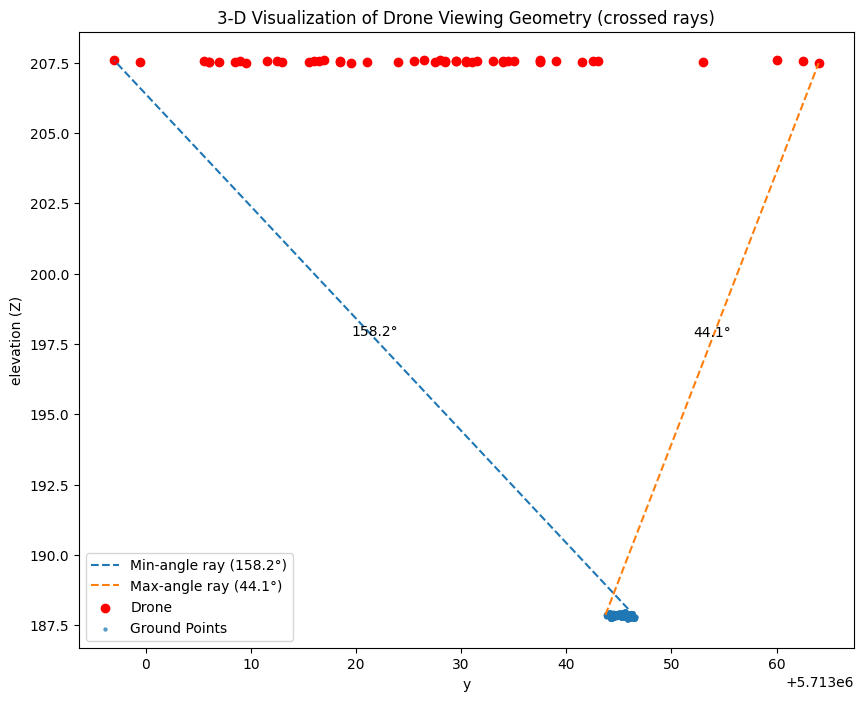

In [20]:
# ------------------------------------------------------------
# 3-D viewing geometry with crossed ground-origin rays
# ------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# subsample for faster scatter rendering
subsample = df.sample(10_000)

# ── locate extrema ───────────────────────────────────────────
min_row_drone = drone_positions.filter(
    pl.col("ycam") == drone_positions["ycam"].min()
)
max_row_drone = drone_positions.filter(
    pl.col("ycam") == drone_positions["ycam"].max()
)

min_row_field = subsample.filter(
    pl.col("Yw") == subsample["Yw"].min()
)
max_row_field = subsample.filter(
    pl.col("Yw") == subsample["Yw"].max()
)

# ── pull scalars ----------------------------------------------------------
y_drone_min, z_drone_min = (
    min_row_drone["ycam"].item(),
    min_row_drone["zcam"].item(),
)
y_drone_max, z_drone_max = (
    max_row_drone["ycam"].item(),
    max_row_drone["zcam"].item(),
)

y_ground_min, z_ground_min = (
    min_row_field["Yw"].item(),
    min_row_field["elev"].item(),
)
y_ground_max, z_ground_max = (
    max_row_field["Yw"].item(),
    max_row_field["elev"].item(),
)

# ── ground-origin vectors (cross-paired) ----------------------
# min-ray:   left-drone → right-ground   (ground is origin)
dy_min_g = y_drone_min - y_ground_max
dz_min_g = z_drone_min - z_ground_max

# max-ray:   right-drone → left-ground   (ground is origin)
dy_max_g = y_drone_max - y_ground_min
dz_max_g = z_drone_max - z_ground_min

angle_min_g = np.degrees(np.arctan2(dz_min_g, dy_min_g))
angle_max_g = np.degrees(np.arctan2(dz_max_g, dy_max_g))

print(f"Min angle (ground-origin, cross): {angle_min_g:.2f}°")
print(f"Max angle (ground-origin, cross): {angle_max_g:.2f}°")

# ── plot crossed rays (ground → drone) ------------------------
ax.plot(
    [y_ground_max, y_drone_min],
    [z_ground_max, z_drone_min],
    "--",
    label=f"Min-angle ray ({angle_min_g:.1f}°)",
)
ax.plot(
    [y_ground_min, y_drone_max],
    [z_ground_min, z_drone_max],
    "--",
    label=f"Max-angle ray ({angle_max_g:.1f}°)",
)

# annotate angles at mid-points
xm_min, zm_min = (
    (y_ground_max + y_drone_min) / 2,
    (z_ground_max + z_drone_min) / 2,
)
xm_max, zm_max = (
    (y_ground_min + y_drone_max) / 2,
    (z_ground_min + z_drone_max) / 2,
)
ax.text(xm_min, zm_min, f"{angle_min_g:.1f}°", ha="center", va="bottom")
ax.text(xm_max, zm_max, f"{angle_max_g:.1f}°", ha="center", va="bottom")

# ── scatter the raw points -----------------------------------
ax.scatter(
    drone_positions["ycam"],
    drone_positions["zcam"],
    c="red",
    label="Drone",
)
ax.scatter(
    subsample["Yw"],
    subsample["elev"],
    s=5,
    alpha=0.6,
    label="Ground Points",
)

# ── axes, title, legend --------------------------------------
ax.set_xlabel("y")
ax.set_ylabel("elevation (Z)")
ax.set_title("3-D Visualization of Drone Viewing Geometry (crossed rays)")
ax.legend()
plt.show()


Min angle (ground-origin, cross): 158.25°
Max angle (ground-origin, cross): 44.05°


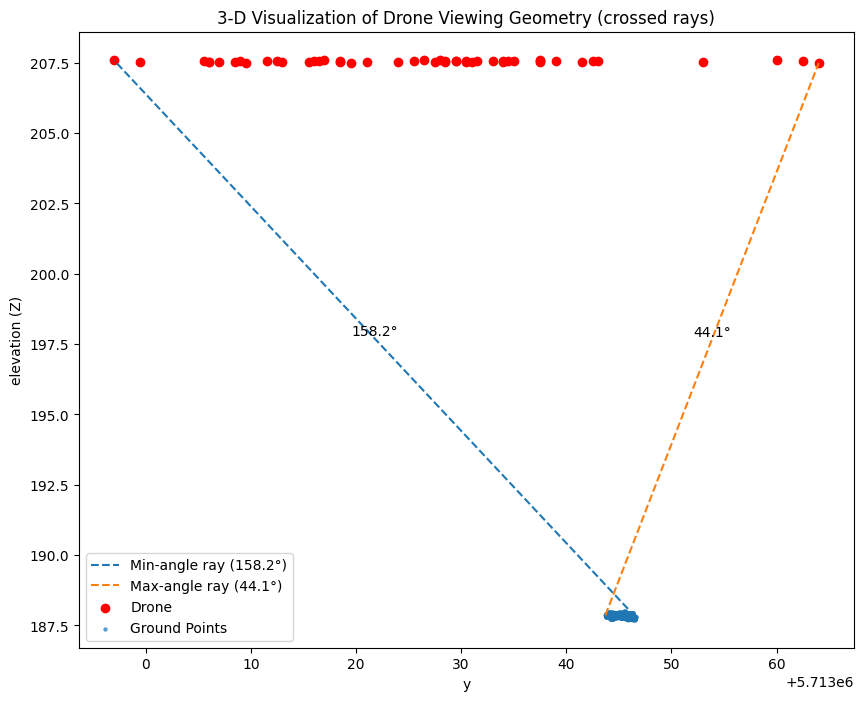